# Proyek Klasifikasi Gambar Rock-Paper-Scissors



## Menyiapkan Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import os

2024-01-16 03:58:04.946108: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-16 03:58:05.174076: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 03:58:05.174195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 03:58:05.206549: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 03:58:05.299140: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-16 03:58:05.300398: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Preprocessing Data


In [2]:
training_dir = 'dataset/training/'
validation_dir = 'dataset/testing/'

In [4]:
training_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

training_generator = training_datagen.flow_from_directory(training_dir,
                                                    batch_size=126,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                                batch_size=128,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))


Found 2128 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


## Membuat Model

In [5]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,
                                input_tensor=Input(shape=(150, 150, 3)))

for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output


2024-01-16 03:58:22.164111: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-16 03:58:22.164959: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
x = tf.keras.layers.Flatten(name="flatten")(last_output)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(pre_trained_model.input, x)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 75, 75, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 75, 75, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 75, 75, 32)           0         ['bn_Conv1[0][0]']        

In [7]:
int_lr = 1e-4
num_epochs = 10

optimizer = tf.optimizers.Adam(lr=int_lr)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Training Model

In [8]:
H = model.fit(training_generator,
              epochs=num_epochs,
              validation_data=validation_generator)


Epoch 1/10


2024-01-16 03:58:35.193541: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 90720000 exceeds 10% of free system memory.
2024-01-16 03:58:35.246451: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 90720000 exceeds 10% of free system memory.
2024-01-16 03:58:35.275822: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 90720000 exceeds 10% of free system memory.
2024-01-16 03:58:35.302680: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 45360000 exceeds 10% of free system memory.
2024-01-16 03:58:35.322362: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 272160000 exceeds 10% of free system memory.


17/17 [==============================] - 25s 1s/step - loss: 9.4306 - accuracy: 0.5315 - val_loss: 0.5295 - val_accuracy: 0.7000
Epoch 2/10
17/17 [==============================] - 22s 1s/step - loss: 0.3436 - accuracy: 0.8576 - val_loss: 0.0824 - val_accuracy: 0.9833
Epoch 3/10
17/17 [==============================] - 21s 1s/step - loss: 0.1417 - accuracy: 0.9525 - val_loss: 0.1117 - val_accuracy: 0.9833
Epoch 4/10
17/17 [==============================] - 20s 1s/step - loss: 0.0801 - accuracy: 0.9723 - val_loss: 0.1434 - val_accuracy: 0.9833
Epoch 5/10
17/17 [==============================] - 21s 1s/step - loss: 0.0753 - accuracy: 0.9737 - val_loss: 0.1009 - val_accuracy: 0.9833
Epoch 6/10
17/17 [==============================] - 23s 1s/step - loss: 0.0655 - accuracy: 0.9817 - val_loss: 0.0832 - val_accuracy: 0.9833
Epoch 7/10
17/17 [==============================] - 24s 1s/step - loss: 0.0530 - accuracy: 0.9821 - val_loss: 0.1011 - val_accuracy: 0.9833
Epoch 8/10
17/17 [=============

## Evaluasi Model

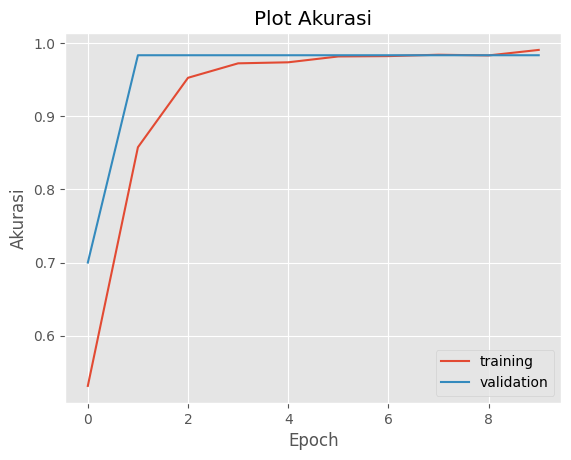

In [9]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="validation")
plt.title("Plot Akurasi")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.legend()
plt.show()


## Menyimpan Model dalam Format SavedModel

In [10]:
save_path = os.path.join("models/rps_model/1/")
tf.saved_model.save(model, save_path)


INFO:tensorflow:Assets written to: models/rps_model/1/assets


INFO:tensorflow:Assets written to: models/rps_model/1/assets
